In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

cf.go_offline()

# Declare dataframe
df = pd.read_csv(r'test_spectra.txt', delimiter = '\t')

# make new baselined dataframe
df_bs = df.copy()

# find the length of the df
# len(df_bs.columns)

# This to subtract the value of each cell with average of that column between 1200-1300 row number
for i in range(1,len(df.columns)):
    df_bs.iloc[:,i] = df_bs.iloc[:,i] - df_bs.iloc[1200:1300,i].mean(axis=0)

#Declaring new df containing only the wavelength
delx = df_bs.iloc[:,0].copy()


In [2]:
#To find the deltaX of the graph by subtracting wavelength at column i with next column
for i in range(0,len(df_bs)):
    if i < (len(df_bs)-1):
        delx.loc[i] = delx.loc[i] - delx.loc[i+1]
    else:
        delx[len(df_bs)-1] = delx[len(df_bs)-2]

In [3]:
#declare the x axis of the later plot from delayed time file
# tau is the delayed time that will be assigned to the integrated intensity
xaxis = pd.read_csv(r'time_duration.txt', delimiter = '\t', header = None)
xaxis['tau'] = xaxis.iloc[:,0] + (xaxis.iloc[:,1]/2)

In [4]:
# intwindow is the ingegration time/duration, in which the integrated intensity will be divided with
intwindow = xaxis.iloc[0:len(df.columns)-1,1].copy().to_frame()

In [5]:
#declare new xaxis taken from the tau
xax = xaxis.iloc[0:len(df.columns)-1,2].to_frame()

In [6]:
#this is the integration process where the intensity in column i multiplied with deltaX
for i in range(1, len(df.columns)):
    df_bs.iloc[:,i] = df_bs.iloc[:,i] * delx.values

In [7]:
#this df_int collect the integration data data from df_bs, not including the X-axis 
df_int = df_bs.iloc[:,1:len(df_bs.columns)].copy()

In [8]:
#inten is the column sum of the df_int
inten = df_int.sum().copy().to_frame()

In [9]:
# this divide the integrated intensity with intwindow
inten['intensity'] = inten.values / intwindow.values
intens = inten.copy()

In [10]:
# This will create new arbitrarycolumn next to tau
xax['intensity'] = xax['tau'] * 1

In [11]:
# This will copy integrated intensity data frim inten to the xax dataframe
for i in range(0, len(inten)):
    xax.iloc[i,1] = inten.iloc[i,1]

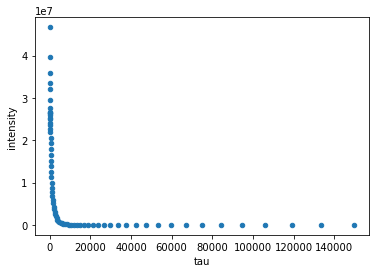

In [12]:
xax.plot(x = 'tau', y = 'intensity', kind = 'scatter') # loglog = True)
plt.show() 

In [13]:
xax.to_csv (r'Pressure1.csv', index = False, header=False)

In [14]:
#get data
data = pd.read_csv(r'Pressure1.csv', header=None, names=['tau','intensity'])

In [15]:
np.log10(data).iplot(kind= 'scatter', x= 'tau', y='intensity', mode='markers')